In [1]:
import pandas as pd
obj=pd.read_csv('first_Matrix_09_13_2018.csv',index_col=0)
obj.head()

,1O2,1Li1O4P1,2Si1,1Mg1,2Mg1,1Se2,1S1,1N1,1Mg2,2Mg1O4,...,11Ba2Mn2,6Ca1Ho1Sn2,6Bi2Ca1Ho1,4Mo1P1,6Ho1Sn2Zn1,2F11W2Y1,11Ba2W2Y1,8Ca1Mn2P2,2Ca1Mn2O8,6Ca1Cr2La1
O,0,0,282,7,2,0,0,2,0,0,...,0,1,1,1,1,0,0,1,0,1
Li,4,0,1,17,12,0,2,1,15,0,...,0,0,0,0,0,0,0,0,0,0
Mg,2,1,35,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P,1,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
F,0,0,0,0,5,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [2]:
obj.loc["O",:].head()

1O2           0
1Li1O4P1      0
2Si1        282
1Mg1          7
2Mg1          2
Name: O, dtype: int64

In [3]:
obj.tail()

,1O2,1Li1O4P1,2Si1,1Mg1,2Mg1,1Se2,1S1,1N1,1Mg2,2Mg1O4,...,11Ba2Mn2,6Ca1Ho1Sn2,6Bi2Ca1Ho1,4Mo1P1,6Ho1Sn2Zn1,2F11W2Y1,11Ba2W2Y1,8Ca1Mn2P2,2Ca1Mn2O8,6Ca1Cr2La1
Os,2,0,0,0,0,1,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
Be,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Th,1,0,0,0,0,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
Tc,1,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
Pu,4,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


obj.head()

In [4]:
obj.index

Index(['O', 'Li', 'Mg', 'P', 'F', 'Mn', 'Fe', 'Si', 'S', 'V', 'Cu', 'Co', 'Ni',
       'Ca', 'Ba', 'Na', 'N', 'Ti', 'Cr', 'Zn', 'B', 'Al', 'K', 'Sn', 'Se',
       'H', 'C', 'Sb', 'Ge', 'Bi', 'Sr', 'Cl', 'W', 'Mo', 'Te', 'Y', 'La',
       'Rb', 'Nb', 'Ga', 'Ag', 'In', 'Cd', 'Cs', 'As', 'Ce', 'Pd', 'Zr', 'I',
       'Tl', 'Au', 'Rh', 'Hf', 'Pb', 'Pt', 'Br', 'Ta', 'Nd', 'Hg', 'Sc', 'Sm',
       'Ru', 'U', 'Pr', 'Ir', 'Yb', 'Ho', 'Er', 'Dy', 'Tb', 'Lu', 'Tm', 'Gd',
       'Eu', 'Re', 'Os', 'Be', 'Th', 'Tc', 'Pu'],
      dtype='object')

In [5]:
from scipy.sparse.linalg import svds, eigs
from scipy.sparse import csc_matrix
#do decompostion for certain matrix
a=csc_matrix(obj, dtype=float)
#a=svds(obj,k=10)
u, s, vt = svds(a, k=10)

In [6]:
#normalization
from sklearn.preprocessing import normalize
obj_raw_norm=normalize(obj, norm='l2', axis=1)
#function usage
#sklearn.preprocessing.normalize(X, norm=’l2’, axis=1, copy=True, return_norm=False)


In [7]:
#norm success, but the label and index are lost
obj_raw_norm[:3]

array([[0.        , 0.        , 0.52252245, ..., 0.00185292, 0.        ,
        0.00185292],
       [0.01211749, 0.        , 0.00302937, ..., 0.        , 0.        ,
        0.        ],
       [0.00761448, 0.00380724, 0.13325334, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
from scipy.sparse.linalg import svds, eigs
from scipy.sparse import csc_matrix
#do decompostion for obj_raw_norm
a=csc_matrix(obj_raw_norm, dtype=float)
#a=svds(obj,k=10)
u, s, vt = svds(a, k=20)

In [9]:
u.shape

(80, 20)

In [10]:
s

array([0.99929641, 1.00394907, 1.00810194, 1.03721344, 1.05915863,
       1.0647803 , 1.0973927 , 1.11911966, 1.13247827, 1.19401786,
       1.21834157, 1.2373492 , 1.27150978, 1.32202285, 1.44833239,
       1.51622524, 1.69052661, 1.74987922, 2.25946504, 3.24676597])

In [11]:
import numpy as np
s_diagonal=np.diag(s)

In [12]:
#get elements mapping value
F=np.dot(u,s_diagonal)

In [13]:
#select elements type from the paper and use pandas substract the raw number
#try to use periodic table pick needed elements
import pymatgen as mg
from pymatgen.core import periodic_table, Element

#build elements list from data(data's index)
elements_list=list(obj.index)

#select main group element
#FIRST try select list from PNAS paper FIG.2.A

#get main group list by pymatgen
test=["Li","Be","B","C","N","O","F"]
group_main_list=[]
for element_string in test:
    Ele=Element(element_string)
    group_main_list.append(Ele.group)

#build elements_list_main, create subset of each group,catch them from elements_list
#sort them by atom number, append the subset to element list

elements_list_main=[]
for group_number in group_main_list:
    #creat subset
    elements_sublist=[]
    for raw_element in elements_list:
        if Element(raw_element).group==group_number:
            if Element(raw_element).number<57 or Element(raw_element).number>71:
                elements_sublist.append(raw_element)
    #sort subset
    elements_sublist.sort(key=lambda x:Element(x).number)
    #add subset to elements_list_main
    elements_list_main+=elements_sublist
    #elements_list_main.append("{}".format(group_number))


#apply the raw number to mapping value
raw_number_list=[]
for element_select in elements_list_main:
    for raw_number in range(len(elements_list)):
        if element_select==elements_list[raw_number]:
            raw_number_list.append(raw_number)
            
    


#draw the mapping(visualization)

#perform pca and visualization


In [14]:
Mg=Element("Cu")

In [15]:
Mg.group

11

In [16]:
Mg.row

4

In [17]:
Mg.number

29

In [18]:
test=["Li","Be","B","C","N","O","F"]
group_main_list=[]
for element_string in test:
    Ele=Element(element_string)
    group_main_list.append(Ele.group)

In [19]:
mylist=['xyz', 'keyword 1000', 'def', 'abc', 'keyword 2', 'keyword 1']
mylist.sort(key=lambda x: (len(x.split())>1, x if len(x.split())==1 else int(x.split()[-1]) ) )
mylist


['abc', 'def', 'xyz', 'keyword 1', 'keyword 2', 'keyword 1000']

In [22]:
import random


random.shuffle(test)

In [23]:
test

['N', 'F', 'Be', 'O', 'C', 'Li', 'B']

In [24]:
test.sort(key=lambda x:Element(x).number)

In [25]:
test

['Li', 'Be', 'B', 'C', 'N', 'O', 'F']

In [26]:
["ac"]+["be"]

['ac', 'be']

In [27]:
F_main=F[raw_number_list,:]

In [35]:
F_main.shape
np.flip(F_main,axis=1)

array([[ 8.61518231e-02, -4.58596835e-02,  1.29003451e-01,
        -1.22366011e-01, -3.13397774e-02, -1.55275170e-01,
         8.19639651e-02,  8.91672163e-02,  4.90859275e-02,
         5.62712901e-03,  9.37123964e-03,  2.22921464e-02,
         5.90917677e-02,  1.86021729e-02,  1.58387101e-01,
         8.32285565e-02, -2.30023882e-01,  2.74551500e-01,
         5.47812363e-02,  4.71809367e-01],
       [ 1.03410943e-01, -6.26557072e-02,  7.21983996e-02,
        -2.40850717e-01,  3.84632887e-02, -1.46963529e-01,
        -3.26701984e-02,  5.38478809e-03,  1.82518542e-02,
         2.98174448e-02,  8.16338071e-02,  4.11176082e-02,
         2.95587230e-02, -2.89057851e-02,  2.06991880e-01,
         2.38284703e-01, -2.81064197e-01, -2.46502553e-02,
        -3.64894068e-02, -1.61772848e-01],
       [ 2.18566168e-01, -1.40498879e-01,  1.25524005e-01,
        -4.63493783e-01,  1.19417317e-01, -3.81138769e-01,
        -2.93679292e-02,  5.71236993e-02, -5.95478501e-04,
        -2.89424500e-02,  7.4

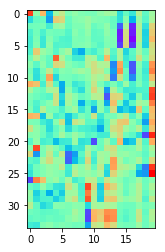

In [36]:
fig=plt.imshow(F_main, interpolation='nearest', cmap="rainbow")

In [30]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

AttributeError: 'AxesImage' object has no attribute 'savefig'

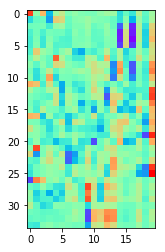

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig=plt.imshow(F_main, interpolation='nearest', cmap="rainbow")
#add x-y axis labels
#change the magnitude of Z(magnitude vs color)
fig.savefig('first_maingroup.png')


fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
plt.title('Legend inside')
ax.legend()
#plt.show()
 
fig.savefig('plot.png')

In [ ]:
a=[[1,2],[3,4]]
a=np.array(a)

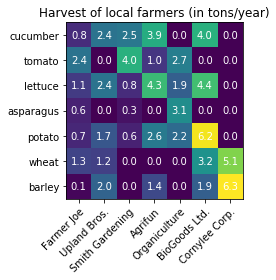

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
ax.set_yticks(np.arange(len(vegetables)))